# NYU CUSP PUI2016
### Assignment 1 Homework 3
### Jonathan Pichot, jp4772       

In [62]:
from __future__ import print_function
__author__= 'jp4772'

import pylab as pl
import seaborn
import random
from scipy.optimize import curve_fit, minimize
    
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


## I am making a dictionary to host the distributions.

that is only one possible option. with a dictionary I can easily inspect the distribution I want by its name: it is a very human friendly data storage. In this example I am only using a single distribution, so for me it is overkill, but if I were doing the whole exercise with 5 or 6 distributions it would be useful!

Lets start by looking at a single chi sq distribution

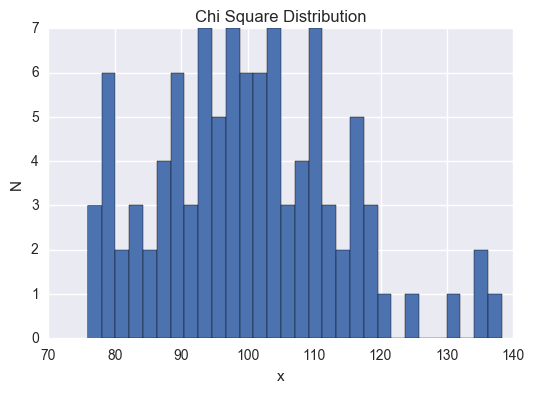

In [69]:
# Note: I am adding imports here, to show the workflow: 
# at this point I realize what packages I need and I import them. 
# but this is a PEP8 violation. 
# It is a good habit to put the includes at the top 
# so the code fails right away if the packages are missing. 
# Otherwise a user may have a piece of code running for a long time, 
# and then fail when the package cannot be imported... 
# (unless they are only imported under conditions, e.g. in an if statement)

import numpy as np
md = {}
# md is an empty disctionary
md['chisq'] = np.random.chisquare(100, size=100)
# md now is a dictionary with one object: an array by the key 'chisq'
pl.hist(md['chisq'], bins = 30)
pl.title("Chi Square Distribution")
pl.ylabel('N')
pl.xlabel('x')

### Figure 1: Chi sq distribution: df = 100, N=100

## let numpy calculate what the mean and stdev of this distribution are

In [70]:
print ("Chisq mean: %.2f, standard deviation: %.2f"%(md['chisq'].mean(), md['chisq'].std()))

Chisq mean: 100.08, standard deviation: 13.69


## Now let's do it for 100 Chisq distributions
we want distributions of different sizes (all integers between 10 and 2000)

In [71]:
mysize = (2000 / (np.array(range(1, 100)))).astype(int)
print (mysize, mysize.shape)

[2000 1000  666  500  400  333  285  250  222  200  181  166  153  142  133
  125  117  111  105  100   95   90   86   83   80   76   74   71   68   66
   64   62   60   58   57   55   54   52   51   50   48   47   46   45   44
   43   42   41   40   40   39   38   37   37   36   35   35   34   33   33
   32   32   31   31   30   30   29   29   28   28   28   27   27   27   26
   26   25   25   25   25   24   24   24   23   23   23   22   22   22   22
   21   21   21   21   21   20   20   20   20] (99,)


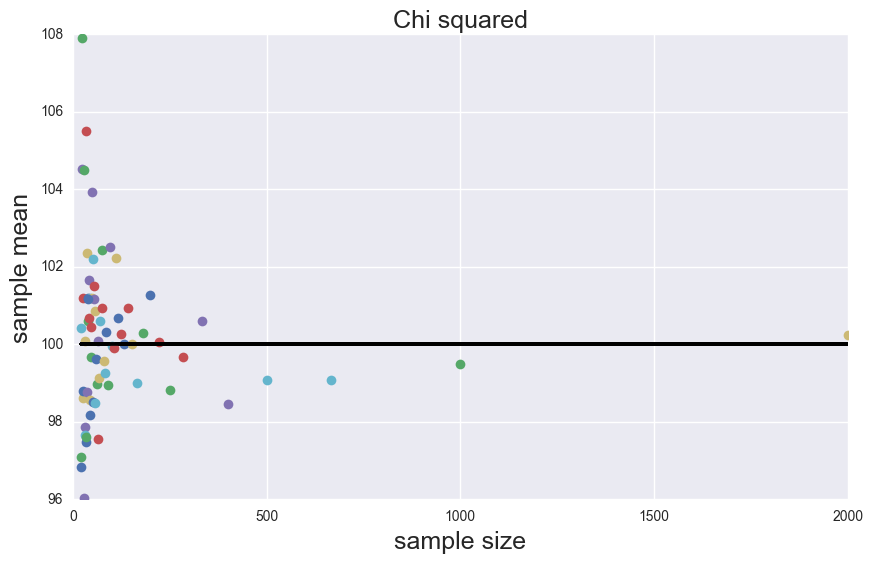

In [72]:
# I am gonna overwrite the disctionary entry created into a nested dictionary 
# the outside dictionary hosts the distributions as dictionary, 
# and each distribution dictionary contains the 100 distribution (arrays of diferent sizes)

md['chisq'] = {} 

#and do it in a for loop. not pythonic, but easily readable

for n in mysize:
    md['chisq'][n] = np.random.chisquare(100, size = n)
    
# save the means for plotting later    

md['chisq']['means'] = {}
axchisq_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['chisq']:
    if not type(nn) == str:
        md['chisq']['means'][nn] = md['chisq'][nn].mean()
        #and plot it
        axchisq_mu_n.plot(nn, md['chisq']['means'][nn], 'o')
        axchisq_mu_n.set_xlabel('sample size', fontsize=18)
        axchisq_mu_n.set_ylabel('sample mean', fontsize=18)
        axchisq_mu_n.set_title('Chi squared', fontsize=18)
        axchisq_mu_n.plot([min(mysize), max(mysize)], [100, 100], 'k')

### Figure 2: Plot of the means of 100 samples of size 2000 > n > 20. Demonstrates how the distribution of the mean of a collection of samples moves towards a standard distribution regardless of whether the samples themselves were standard distributed.

# now the histogram of the mean of all samples: 
## this requires some data wrangling, since i put the data in a dictionary which is a user friendly data structure, but perhaps not the most machine friendly one

a coder friendly, though not terribly pythonic way to do it is to append each mean in a list in a for loop, and then hist that. be careful: if your data size gets large this becomes a very bad idea!!

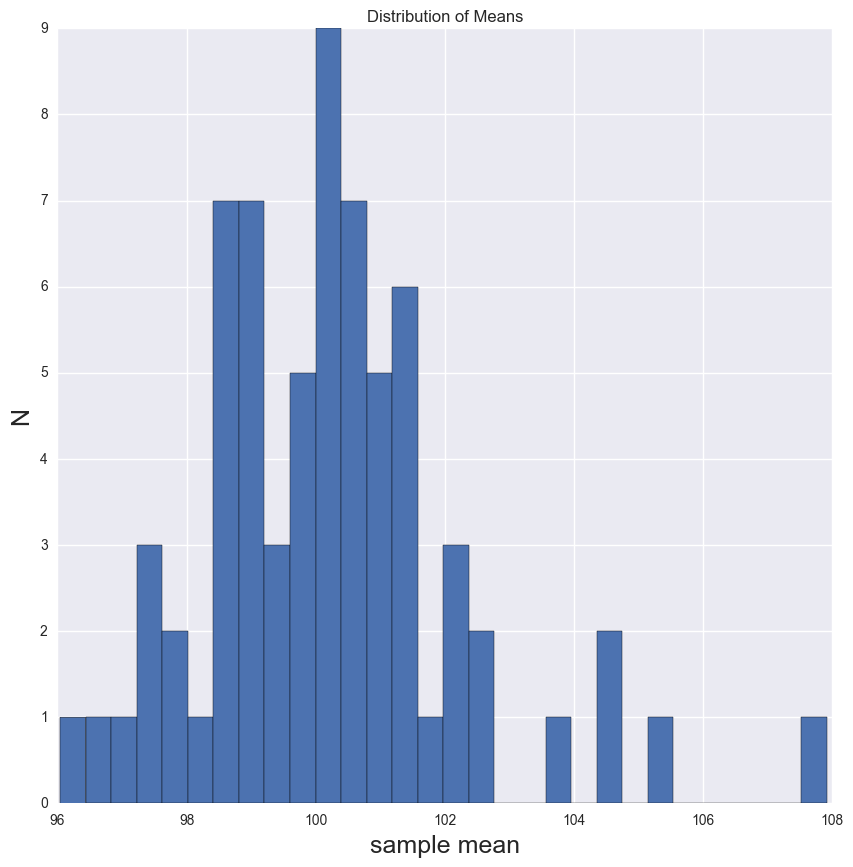

In [73]:
allmeans = list(md['chisq']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=30)
pl.title("Distribution of Means")
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)

### Figure 3: Histogram of the means of 100 samples of non-normally distributed samples.

# Normal distribution


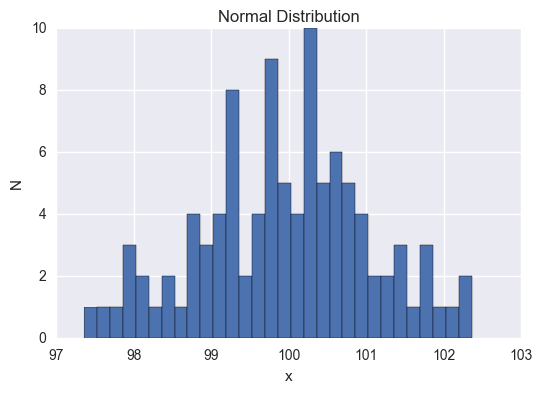

In [74]:
# Create 100 random samples from a normal Guassian distribution
normal = np.random.normal(100, size=100)

# Plot them
pl.hist(normal, bins=30)
pl.title("Normal Distribution")
pl.ylabel('N')
pl.xlabel('x')

### Figure 4: Normal distribution, mean=100 n=100

In [75]:
# Mean and standard deviation of the above sample.

print ("Normal mean: {}".format(normal.mean()))
print ("Standard deviation: {}".format(normal.std()))

Normal mean: 99.9602271632
Standard deviation: 1.08687719609


In [76]:
# Get random sample of 100 integers

normal_sample = random.choice(range(10, 2000), 100)
print (normal_sample, normal_sample.shape)

[  30  467  592 1526 1912 1546 1381 1251 1137  179  702 1861  961 1796 1587
  219 1279 1331  310 1044   58 1013  865 1033  682 1018 1725 1126 1093 1314
  921 1123  743 1111  106  542 1820 1141  386  860  665 1831 1073  661 1634
  471 1505 1474 1893  126 1131 1901 1044 1908 1955 1330  174 1135  795 1010
 1951 1983  240  510 1944 1337  677  820 1161  245 1388  442 1067  586  184
 1380 1157 1043  890  463  471  422  587 1274  230  730 1817  328  787  787
 1621 1967 1481 1059 1567  573 1796 1946  597 1572] (100,)


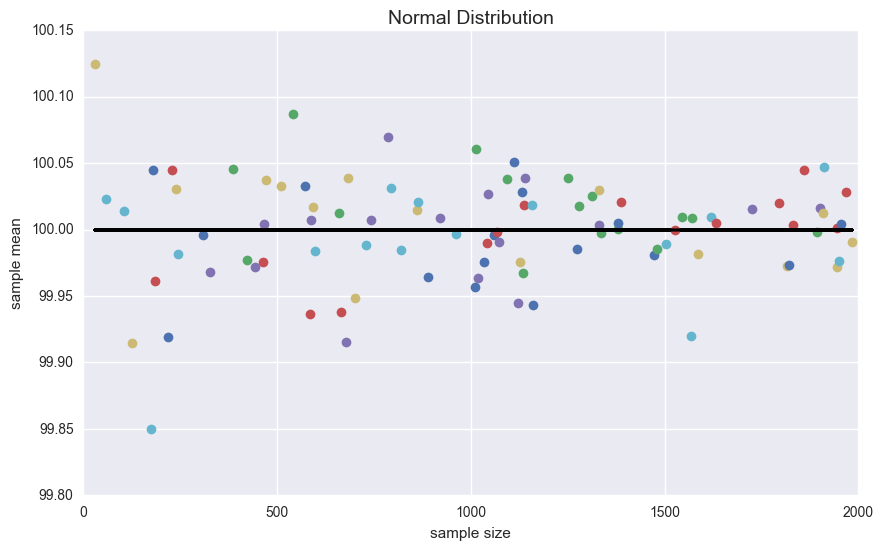

In [79]:
normal_dict = {}
for n in normal_sample:
    normal_dict[n] = np.random.normal(100, size=n)  
    
normal_means = {}
normal_figure = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in normal_dict:
    # Get the mean
    normal_means[nn] = normal_dict[nn].mean()
    
    # Plot it
    normal_figure.plot(nn, normal_means[nn], 'o')
    
    # Make sure matplotlib does not offset the y-axis values
    ax = pl.gca()
    ax.get_yaxis().get_major_formatter().set_useOffset(False)
    
    normal_figure.set_xlabel('sample size')
    normal_figure.set_ylabel('sample mean')
    normal_figure.set_title('Normal Distribution', fontsize=14)
    
    normal_figure.plot([min(normal_sample), max(normal_sample)], [100, 100], 'k')

### Figure 5: Plot of the means of 100 samples of size 2000 > n > 20. They approach the mean of 100 the larger the sample size.

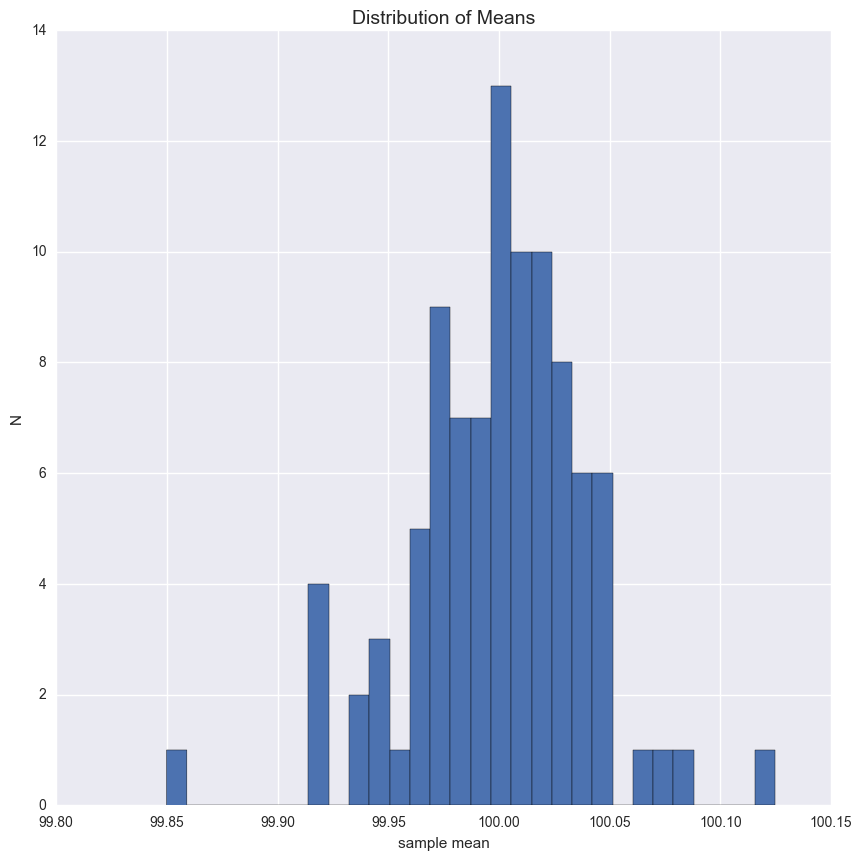

In [80]:
pl.figure(figsize=(10, 10))
pl.hist(list(normal_means.values()), bins=30)

# Make sure matplotlib does not offset the x-axis values
ax = pl.gca()
ax.get_xaxis().get_major_formatter().set_useOffset(False)

pl.title("Distribution of Means", fontsize=14)
pl.xlabel('sample mean')
pl.ylabel('N')

### Figure 6: Histogram plot of the means of the 100 normally distributed samples.

# Poisson distribution

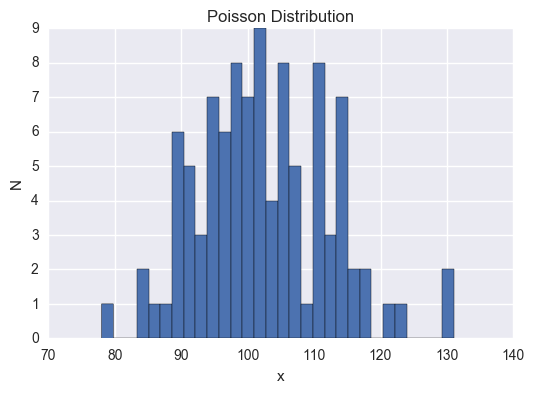

In [85]:
# Create 100 random samples from a Poisson distribution
poisson = np.random.poisson(100, size=100)

# Plot them
pl.hist(poisson, bins=30)
pl.title("Poisson Distribution")
pl.ylabel('N')
pl.xlabel('x')

### Figure 7: Poisson Distribution, n=100 mean=100

In [86]:
# Mean and standard deviation of the above sample.

print ("Poisson mean: {}".format(poisson.mean()))
print ("Standard deviation: {}".format(poisson.std()))

Poisson mean: 102.35
Standard deviation: 9.83298021965


In [94]:
# Get random sample of 100 integers

poisson_sample = random.choice(range(10, 2000), 100)
print (poisson_sample, poisson_sample.shape)

[1461  573  514  548 1961  316  222 1883  135  155 1055  299  356  462 1326
  678   15 1335 1088  677  790  833  781  327 1056 1365 1180 1563  508 1556
 1056  292  390   25 1429  809  435  592  407 1655  288  833 1424 1650 1973
 1026 1239  580   56 1697  653 1960 1539 1992 1134  544 1489  845 1377 1517
 1940  879  375 1420   48 1646  469  847 1002  892 1556   51 1834 1997 1670
  466  226  558 1440 1766  382  488 1337 1147  377  686  917  698 1049 1055
  378 1224  584 1072  801  474 1641  235  929   44] (100,)


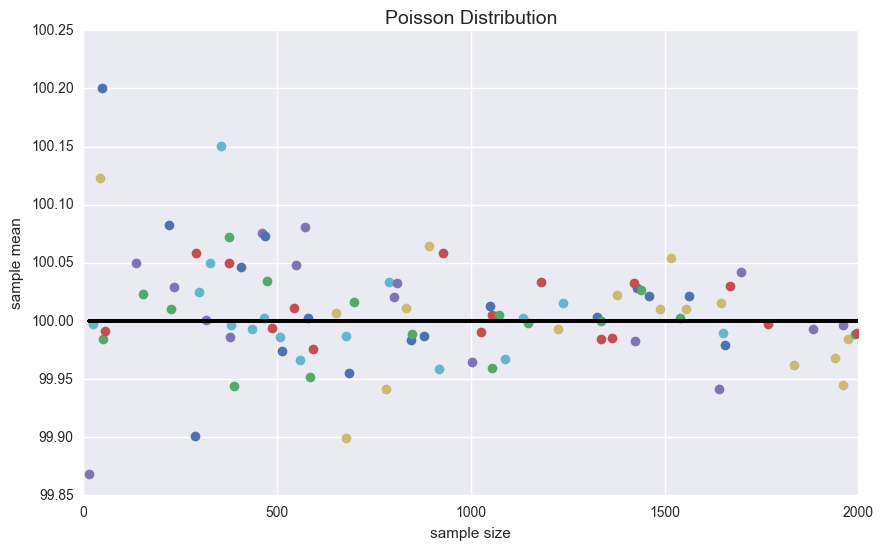

In [98]:
poisson_dict = {}
for n in poisson_sample:
    poisson_dict[n] = np.random.normal(100, size=n)  
    
poisson_means = {}
poisson_figure = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in poisson_dict:
    # Get the mean
    poisson_means[nn] = poisson_dict[nn].mean()
    
    # Plot it
    poisson_figure.plot(nn, poisson_means[nn], 'o')
    
    # Make sure matplotlib does not offset the y-axis values
    ax = pl.gca()
    ax.get_yaxis().get_major_formatter().set_useOffset(False)
    
    poisson_figure.set_xlabel('sample size')
    poisson_figure.set_ylabel('sample mean')
    poisson_figure.set_title('Poisson Distribution', fontsize=14)
    
    poisson_figure.plot([min(poisson_sample), max(poisson_sample)], [100, 100], 'k')

### Figure 8: Scatter plot of the means of samples to the sample size. The larger the sample size, the closer the mean of the sample gets to 100.

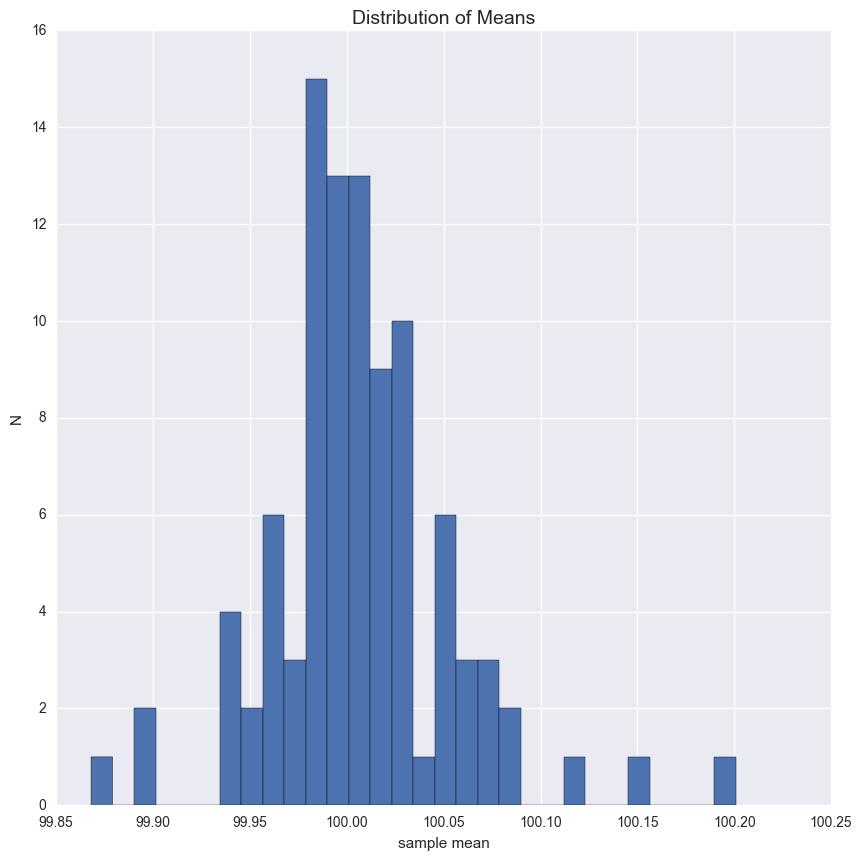

In [101]:
pl.figure(figsize=(10, 10))
pl.hist(list(poisson_means.values()), bins=30)

# Make sure matplotlib does not offset the x-axis values
ax = pl.gca()
ax.get_xaxis().get_major_formatter().set_useOffset(False)

pl.title("Distribution of Means", fontsize=14)
pl.xlabel('sample mean')
pl.ylabel('N')

### Figure 9: Histogram plot of the means of the 100 Poisson distributed samples.

# Binomial distribution

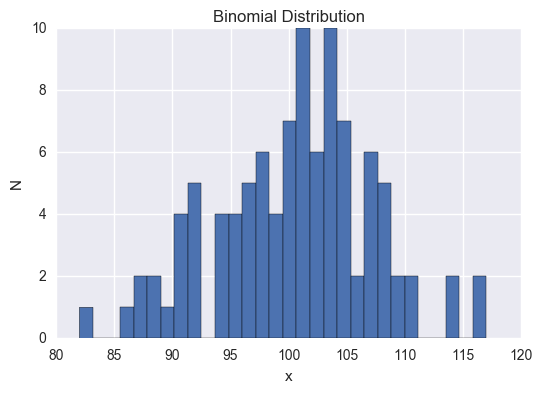

In [89]:
# Create 100 random samples from a Binomial distribution
binomial = np.random.binomial(200, 0.5, size=100)

# Plot them
pl.hist(binomial, bins=30)
pl.title("Binomial Distribution")
pl.ylabel('N')
pl.xlabel('x')

### Figure 10: Binomial Distribution. 100 samples of 200 tries at a 0.5 probability.

In [92]:
# Mean and standard deviation of the above sample.

print ("Binomial mean: {}".format(binomial.mean()))
print ("Standard deviation: {}".format(binomial.std()))

Binomial mean: 100.38
Standard deviation: 6.78790100105


In [95]:
# Get random sample of 100 integers

binomial_sample = random.choice(range(10, 2000), 100)
print (binomial_sample, binomial_sample.shape)

[1585 1153 1356 1135  373 1373  653   97  908 1040 1780 1660   93 1744 1453
  328  171 1597  829 1570 1204 1851 1871  743 1180  827 1534 1095  922 1870
 1337 1011 1128  187  245 1575  480 1508  196  293  392  303 1530 1358  238
 1201   79  407  692 1365  711 1692 1263  316  844 1884  220 1070 1313  892
  640  719  210 1787  822  835  721 1240  639 1735 1160  445  865  519 1636
 1814  737 1984   28 1538  892   94  175  484 1810 1609 1726  375   82 1511
  606  600 1593  264 1182  224  410 1099  949  877] (100,)


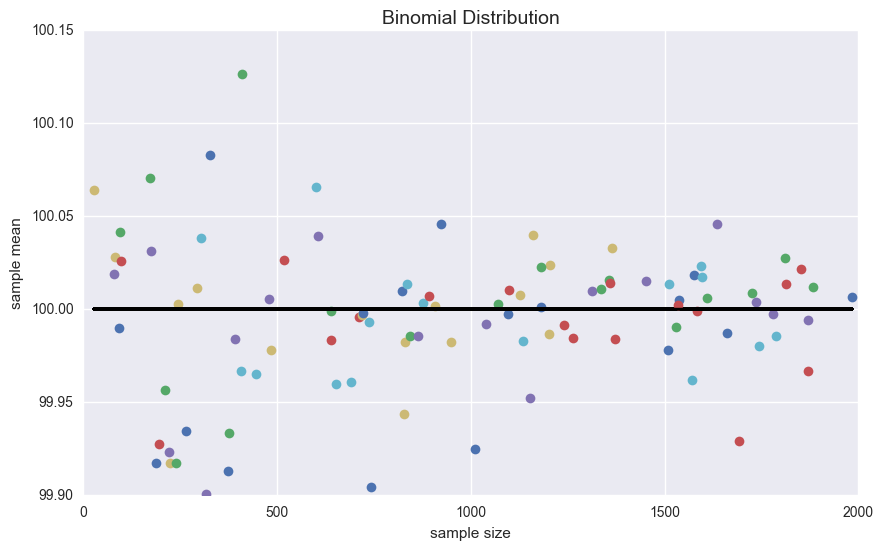

In [97]:
binomial_dict = {}
for n in binomial_sample:
    binomial_dict[n] = np.random.normal(100, size=n)  
    
binomial_means = {}
binomial_figure = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in binomial_dict:
    # Get the mean
    binomial_means[nn] = binomial_dict[nn].mean()
    
    # Plot it
    binomial_figure.plot(nn, binomial_means[nn], 'o')
    
    # Make sure matplotlib does not offset the y-axis values
    ax = pl.gca()
    ax.get_yaxis().get_major_formatter().set_useOffset(False)
    
    binomial_figure.set_xlabel('sample size')
    binomial_figure.set_ylabel('sample mean')
    binomial_figure.set_title('Binomial Distribution', fontsize=14)
    
    binomial_figure.plot([min(binomial_sample), max(binomial_sample)], [100, 100], 'k')

### Figure 11: Scatter plot of the means of samples to the sample size. The larger the sample size, the closer the mean of the sample gets to 100.

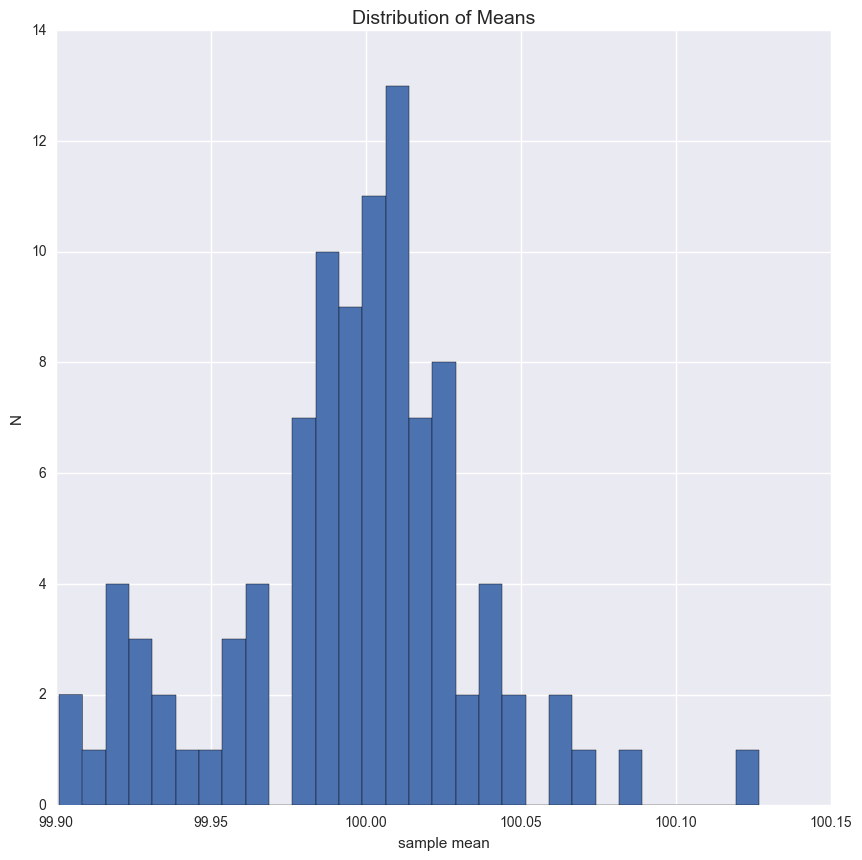

In [104]:
pl.figure(figsize=(10, 10))
pl.hist(list(binomial_means.values()), bins=30)

# Make sure matplotlib does not offset the x-axis values
ax = pl.gca()
ax.get_xaxis().get_major_formatter().set_useOffset(False)

pl.title("Distribution of Means", fontsize=14)
pl.xlabel('sample mean')
pl.ylabel('N')

### Figure 12: Histogram plot of the means of the 100 binomially distributed samples.

# Wald distribution

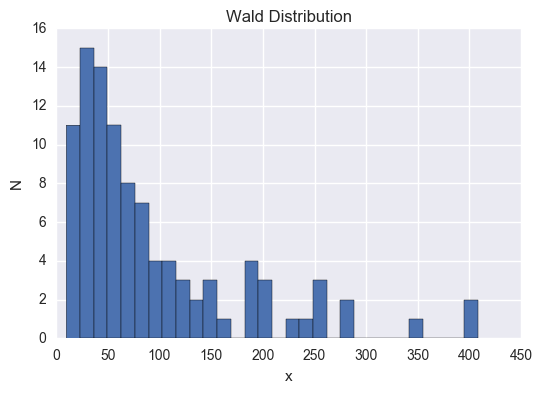

In [91]:
# Create 100 random samples from a Wald distribution
wald = np.random.wald(100, 100, size=100)

# Plot them
pl.hist(wald, bins=30)
pl.title("Wald Distribution")
pl.ylabel('N')
pl.xlabel('x')

### Figure 13: Wald distribution with a mean of 100.

In [93]:
# Mean and standard deviation of the above sample.

print ("Wald mean: {}".format(binomial.mean()))
print ("Standard deviation: {}".format(binomial.std()))

Wald mean: 100.38
Standard deviation: 6.78790100105


In [96]:
# Get random sample of 100 integers

wald_sample = random.choice(range(10, 2000), 100)
print (wald_sample, wald_sample.shape)

[1233  823 1640  243  870  673  845  486 1036  763 1519  978  601  823  228
 1646 1560 1396  219  293  995  661 1632  827 1553 1162 1301  127  477 1528
 1336  834 1144  266 1131  396  763 1944  949 1676  524  858 1981 1096  454
  784  410 1722 1067  316 1555 1783 1158 1288 1613 1258  236 1972 1885 1613
 1517  404  984  466 1702  561 1723 1729  222   22  888  975  964 1820  427
 1487 1274 1307 1407  708  430 1855 1477 1021 1049  940  900 1499  170 1713
 1034  720   68 1996 1600  283  935  928 1599 1040] (100,)


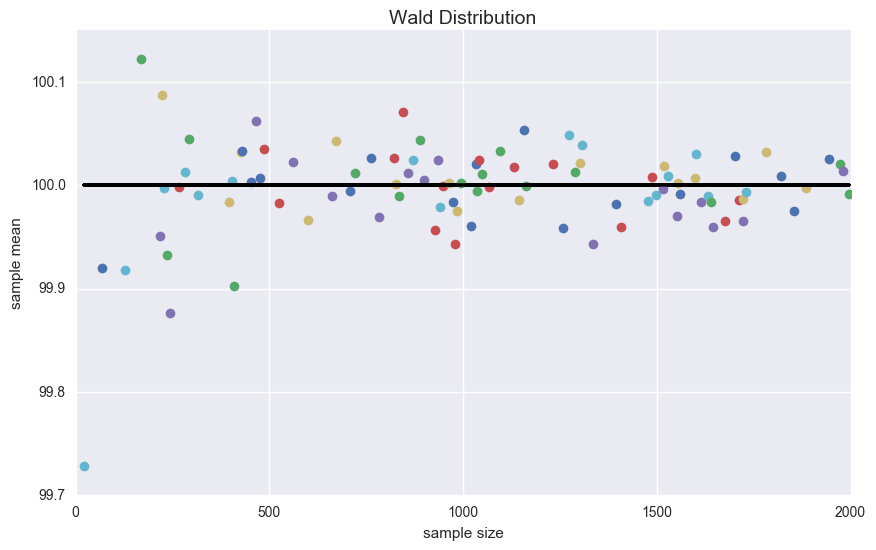

In [100]:
wald_dict = {}
for n in wald_sample:
    wald_dict[n] = np.random.normal(100, size=n)  
    
wald_means = {}
wald_figure = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in wald_dict:
    # Get the mean
    wald_means[nn] = wald_dict[nn].mean()
    
    # Plot it
    wald_figure.plot(nn, wald_means[nn], 'o')
    
    # Make sure matplotlib does not offset the y-axis values
    ax = pl.gca()
    ax.get_yaxis().get_major_formatter().set_useOffset(False)
    
    wald_figure.set_xlabel('sample size')
    wald_figure.set_ylabel('sample mean')
    wald_figure.set_title('Wald Distribution', fontsize=14)
    
    wald_figure.plot([min(wald_sample), max(wald_sample)], [100, 100], 'k')

### Figure 14: Scatter plot of the means of samples to the sample size. The larger the sample size, the closer the mean of the sample gets to 100.

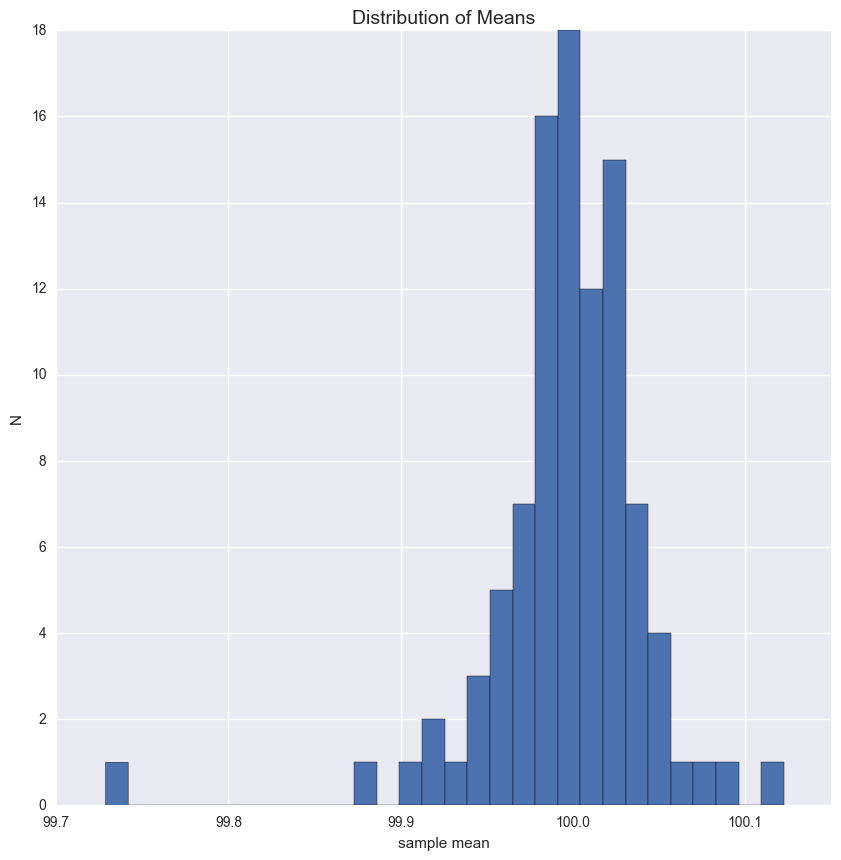

In [103]:
pl.figure(figsize=(10, 10))
pl.hist(list(wald_means.values()), bins=30)

# Make sure matplotlib does not offset the x-axis values
ax = pl.gca()
ax.get_xaxis().get_major_formatter().set_useOffset(False)

pl.title("Distribution of Means", fontsize=14)
pl.xlabel('sample mean')
pl.ylabel('N')

### Figure 15: Histogram plot of the means of the 100 Wald distributed samples.